In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Orange3_colab/Orange3/O3_PCA/healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [ ]:
#입력 변수 중 구간 변수만 추출 나이(age), 평균 혈당치(avg_glucose_level), 체질량 지수(bmi)
cols = ['age', 'avg_glucose_level', 'bmi']
df1 = df[cols]
df1.head(3)

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5


In [ ]:
#결측값 제거 (주성분 분석에는 결측값이 없어야 함)
df2 = df1.dropna() # 데이터프레임 df1의 결측값이 있는 행을 제거한 후 df2에 저장
df2.describe() # 데이터프레임 df2의 기초 통계량 표시


,age,avg_glucose_level,bmi
count,4909.000000,4909.000000,4909.000000
mean,42.865374,105.305150,28.893237
std,22.555115,44.424341,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.070000,23.500000
50%,44.000000,91.680000,28.100000
75%,60.000000,113.570000,33.100000
max,82.000000,271.740000,97.600000


In [ ]:
#데이터 스케일 표준화
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df2) #df2 데이터 표준화

In [ ]:
#PCA 검사 실행
from sklearn.decomposition import PCA #PCA를 사이킷런 라이브러리에서 불러오기

pca = PCA(n_components=2) #주성분을 2개로 지정
X_pca = pca.fit_transform(X_scaled) # X_scaled 주성분 분석 후 결과를 X_pca에 저장

In [ ]:
#numpy array 형태의 X_pca를 데이터프레임으로 변환 / 변수 명은 PC1, PC2로 지정
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca.shape

(4909, 2)

In [ ]:
df_pca.head(3)

,PC1,PC2
0,2.650888,-1.634549
1,1.315375,0.552382
2,1.332632,-0.846288


In [ ]:
#각 주성분이 설명하는 분산 비율 표기
print(pca.explained_variance_ratio_)

[0.5008308  0.27977091]


In [ ]:
#numpy array 형태인 X_scaled를 데이터프레임으로 변환
#변수명은 cols로 지정
#cols에는 기존 세 개의 변수명이 들어있음
df_scaled = pd.DataFrame(data = X_scaled, columns = cols)
df_scaled.shape

(4909, 3)

In [ ]:
df_scaled.head(3)

,age,avg_glucose_level,bmi
0,1.070138,2.777698,0.981345
1,1.646563,0.013842,0.459269
2,0.272012,1.484132,0.701207


In [ ]:
#df_scaled를 csv 형태의 파일로 저장
df_scaled.to_csv('/content/drive/MyDrive/Orange3_colab/Orange3/O3_PCA/stroke_scaled.csv', index = False)

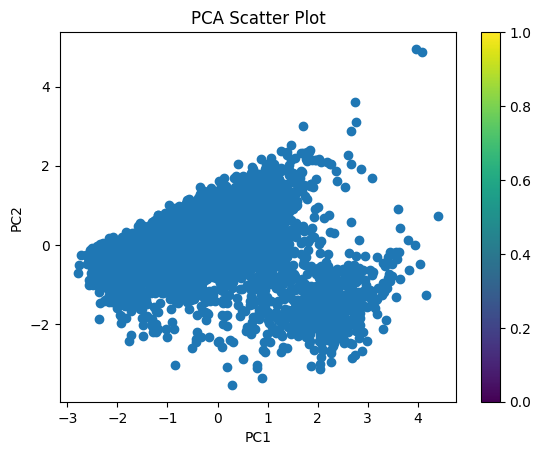

In [ ]:
import matplotlib.pyplot as plt

# 주성분 분석 결과를 scatter plot으로 시각화
plt.scatter(df_pca['PC1'], df_pca['PC2'])

# 축 이름 설정
plt.xlabel('PC1')
plt.ylabel('PC2')

# 그래프 제목 설정
plt.title('PCA Scatter Plot')

# 컬러바 추가
plt.colorbar()

# 그래프 표시
plt.show()